In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [8]:
#processed_dir = 'D:\\Notebooks\\DS400-Capstone\\main\\Processed_Network_dataset'
processed_dir = 'C:\\Users\\soup\\Desktop\\DS400-Capstone\\DS400-Capstone\\main\\Processed_datasets\\Processed_Network_dataset'
data1 = pd.read_csv(processed_dir+'\\Network_dataset_1.csv')

In [34]:
sets = os.listdir(processed_dir)
full_data = pd.DataFrame()
for dataset in sets:
    cur = pd.read_csv(processed_dir+"\\"+dataset)
    full_data = pd.concat([cur, full_data], axis=0)

In [35]:
n_samps = 80000
data = pd.concat([ full_data[full_data['label']==1].sample(n=n_samps), full_data[full_data['label']==0].sample(n=n_samps) ], axis=0)
#data = pd.concat([ data1[data1['label']==1].sample(n=n_samps), data1[data1['label']==0].sample(n=n_samps) ], axis=0)
data.reset_index(drop=True, inplace=True)

In [36]:
del(full_data)

In [37]:
len(data)

160000

In [38]:
data.columns

Index(['ts', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 'proto', 'service',
       'duration', 'src_bytes', 'dst_bytes', 'conn_state', 'missed_bytes',
       'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'dns_query',
       'dns_qclass', 'dns_qtype', 'dns_rcode', 'dns_AA', 'dns_RD', 'dns_RA',
       'dns_rejected', 'ssl_version', 'ssl_cipher', 'ssl_resumed',
       'ssl_established', 'ssl_subject', 'ssl_issuer', 'http_trans_depth',
       'http_method', 'http_uri', 'http_version', 'http_request_body_len',
       'http_response_body_len', 'http_status_code', 'http_user_agent',
       'http_orig_mime_types', 'http_resp_mime_types', 'weird_name',
       'weird_addl', 'weird_notice', 'label', 'type'],
      dtype='object')

In [39]:
val_counts = data['label'].value_counts()
diff = val_counts[1]-val_counts[0]

In [25]:
data = data.drop(data[data['label'] == 1.0].sample(n=(diff)).index)

In [40]:
data['label'].value_counts()

1.0    80000
0.0    80000
Name: label, dtype: int64

In [41]:
data.head(5)

ts        src_ip  src_port          dst_ip  dst_port proto service  \
0  1556027593  192.168.1.32   45618.0  192.168.35.224      80.0   tcp       -   
1  1556350361  192.168.1.35   52206.0   192.168.1.195      80.0   tcp    http   
2  1556343627  192.168.1.36   32951.0     192.168.1.1      53.0   udp     dns   
3  1556158658  192.168.1.30    6075.0   192.168.1.184    6075.0   tcp       -   
4  1556210392  192.168.1.30   39568.0   192.168.1.184     443.0   tcp       -   

   duration  src_bytes  dst_bytes  ... http_response_body_len  \
0  0.000000        0.0        0.0  ...                    0.0   
1  0.034451      353.0     1282.0  ...                    0.0   
2  0.002275       74.0       90.0  ...                    0.0   
3  0.000016        0.0        0.0  ...                    0.0   
4  0.000004        0.0        0.0  ...                    0.0   

   http_status_code  http_user_agent  http_orig_mime_types  \
0               0.0                -                     -   
1               0.0                -                     -   
2               0.0                -                     -   
3               0.0                -                     -   
4               0.0                -                     -   

   http_resp_mime_types  weird_name weird_addl  weird_notice  label      type  
0                     -           -          -             -    1.0  scanning  
1                     -           -          -             -    1.0       xss  
2                     -           -          -             -    1.0       xss  
3                     -           -          -             -    1.0       dos  
4                     -           -          -             -    1.0      ddos  

[5 rows x 45 columns]

In [42]:
data['type'].value_counts()

normal        80000
scanning      26900
ddos          23344
dos           12768
xss            7803
password       5275
backdoor       1897
injection      1724
ransomware      285
mitm              4
Name: type, dtype: int64

In [43]:
data['service'][0]

'-'

In [44]:
data.replace(to_replace='-', value=np.nan, inplace=True)

In [45]:
# Drop columns that are defiantely not wanted
data.drop(['ts','src_ip','dst_ip','type'], axis=1, inplace=True)

<AxesSubplot:>

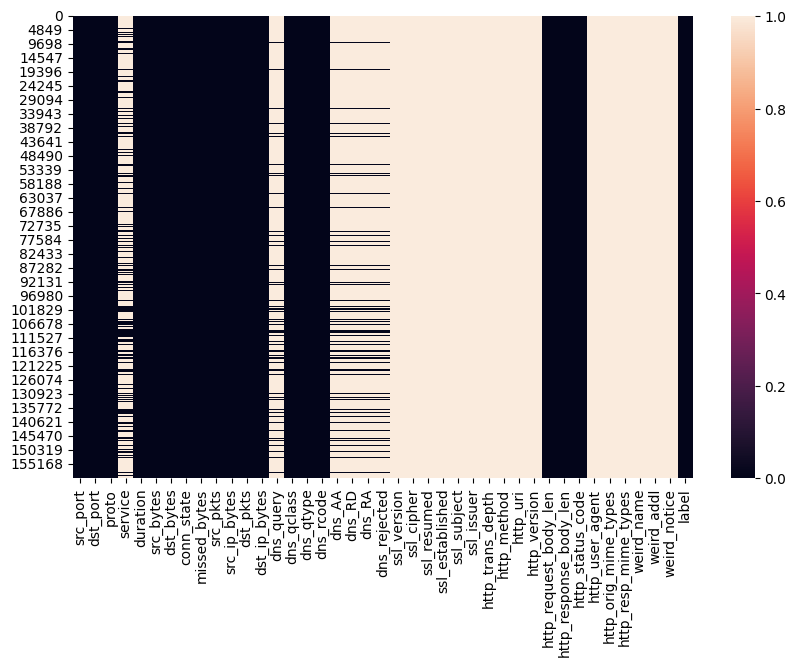

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna())

In [47]:
data.head(5)

src_port  dst_port proto service  duration  src_bytes  dst_bytes  \
0   45618.0      80.0   tcp     NaN  0.000000        0.0        0.0   
1   52206.0      80.0   tcp    http  0.034451      353.0     1282.0   
2   32951.0      53.0   udp     dns  0.002275       74.0       90.0   
3    6075.0    6075.0   tcp     NaN  0.000016        0.0        0.0   
4   39568.0     443.0   tcp     NaN  0.000004        0.0        0.0   

  conn_state  missed_bytes  src_pkts  ...  http_request_body_len  \
0        OTH           0.0       1.0  ...                    0.0   
1         SF           0.0       6.0  ...                    0.0   
2         SF           0.0       2.0  ...                    0.0   
3        REJ           0.0       1.0  ...                    0.0   
4         S1           0.0       2.0  ...                    0.0   

   http_response_body_len  http_status_code http_user_agent  \
0                     0.0               0.0             NaN   
1                     0.0               0.0             NaN   
2                     0.0               0.0             NaN   
3                     0.0               0.0             NaN   
4                     0.0               0.0             NaN   

   http_orig_mime_types  http_resp_mime_types  weird_name weird_addl  \
0                   NaN                   NaN         NaN        NaN   
1                   NaN                   NaN         NaN        NaN   
2                   NaN                   NaN         NaN        NaN   
3                   NaN                   NaN         NaN        NaN   
4                   NaN                   NaN         NaN        NaN   

  weird_notice label  
0          NaN   1.0  
1          NaN   1.0  
2          NaN   1.0  
3          NaN   1.0  
4          NaN   1.0  

[5 rows x 41 columns]

In [48]:
nulls = data.isna().sum()
nulls

src_port                       0
dst_port                       0
proto                          0
service                   113368
duration                       0
src_bytes                      0
dst_bytes                      0
conn_state                     0
missed_bytes                   0
src_pkts                       0
src_ip_bytes                   0
dst_pkts                       0
dst_ip_bytes                   0
dns_query                 139412
dns_qclass                     0
dns_qtype                      0
dns_rcode                      0
dns_AA                    139219
dns_RD                    139219
dns_RA                    139219
dns_rejected              139219
ssl_version               159890
ssl_cipher                159890
ssl_resumed               159825
ssl_established           159825
ssl_subject               159926
ssl_issuer                159926
http_trans_depth          159909
http_method               159911
http_uri                  159911
http_versi

In [53]:
bad_cols = []
for i in range(len(nulls)):
    if nulls[i] > 0.7*len(data):
        bad_cols.append(nulls.index[i])        
bad_cols

['service',
 'dns_query',
 'dns_AA',
 'dns_RD',
 'dns_RA',
 'dns_rejected',
 'ssl_version',
 'ssl_cipher',
 'ssl_resumed',
 'ssl_established',
 'ssl_subject',
 'ssl_issuer',
 'http_trans_depth',
 'http_method',
 'http_uri',
 'http_version',
 'http_user_agent',
 'http_orig_mime_types',
 'http_resp_mime_types',
 'weird_name',
 'weird_addl',
 'weird_notice']

In [54]:
data.drop(bad_cols, axis=1, inplace=True)

In [55]:
data.head()

src_port  dst_port proto  duration  src_bytes  dst_bytes conn_state  \
0   45618.0      80.0   tcp  0.000000        0.0        0.0        OTH   
1   52206.0      80.0   tcp  0.034451      353.0     1282.0         SF   
2   32951.0      53.0   udp  0.002275       74.0       90.0         SF   
3    6075.0    6075.0   tcp  0.000016        0.0        0.0        REJ   
4   39568.0     443.0   tcp  0.000004        0.0        0.0         S1   

   missed_bytes  src_pkts  src_ip_bytes  dst_pkts  dst_ip_bytes  dns_qclass  \
0           0.0       1.0          40.0       0.0           0.0         0.0   
1           0.0       6.0         613.0       5.0        1494.0         0.0   
2           0.0       2.0         130.0       2.0         146.0         1.0   
3           0.0       1.0          40.0       1.0          40.0         0.0   
4           0.0       2.0         112.0       1.0          60.0         0.0   

   dns_qtype  dns_rcode  http_request_body_len  http_response_body_len  \
0        0.0        0.0                    0.0                     0.0   
1        0.0        0.0                    0.0                     0.0   
2        1.0        0.0                    0.0                     0.0   
3        0.0        0.0                    0.0                     0.0   
4        0.0        0.0                    0.0                     0.0   

   http_status_code  label  
0               0.0    1.0  
1               0.0    1.0  
2               0.0    1.0  
3               0.0    1.0  
4               0.0    1.0

<AxesSubplot:>

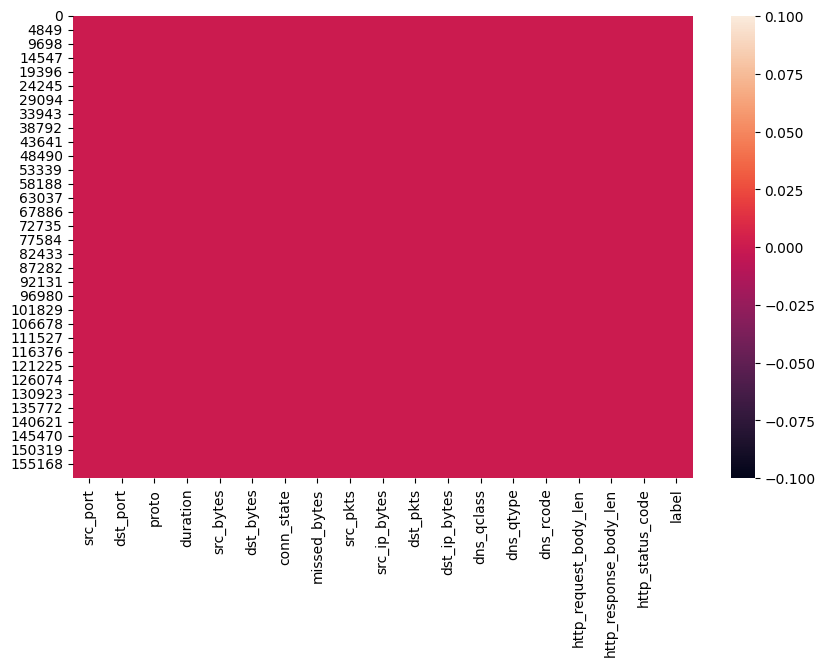

In [56]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna())

In [70]:
data['dns_AA'].value_counts()

F    44270
T     7979
Name: dns_AA, dtype: int64

In [71]:
data['http_status_code'].value_counts()

0.0      399716
302.0       179
200.0        75
206.0        17
400.0         7
404.0         4
403.0         1
304.0         1
Name: http_status_code, dtype: int64

In [72]:
data['service'].value_counts()

dns                68365
http               43803
ssl                 4429
ftp                  149
smtp;ssl              84
ssl;smtp              67
imap;ssl              64
dhcp                  18
gssapi;ntlm;smb        3
gssapi;smb;ntlm        3
ftp-data               2
gssapi                 2
smb;ntlm;gssapi        2
smtp                   2
ssl;imap               1
radius                 1
irc                    1
dce_rpc                1
smb;gssapi;ntlm        1
smb;gssapi             1
Name: service, dtype: int64

In [73]:
data['dst_port'].value_counts()

80.0       70736
53.0       62103
443.0      39117
15600.0    12688
7878.0     12021
           ...  
40347.0        1
36638.0        1
33903.0        1
34899.0        1
51763.0        1
Name: dst_port, Length: 28774, dtype: int64

In [74]:
# Need to categorize src_port and dst_port

In [57]:
from sklearn.preprocessing import OneHotEncoder

In [60]:
data.drop(['src_port','dst_port'],axis=1,inplace=True)

In [61]:
data.columns

Index(['proto', 'duration', 'src_bytes', 'dst_bytes', 'conn_state',
       'missed_bytes', 'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes',
       'dns_qclass', 'dns_qtype', 'dns_rcode', 'http_request_body_len',
       'http_response_body_len', 'http_status_code', 'label'],
      dtype='object')

In [63]:
onehot = OneHotEncoder(drop='first')
onehot_cats = ['proto','conn_state','dns_qclass','dns_qtype','dns_rcode','http_status_code']
df_onehot = data[onehot_cats]

In [64]:
df_onehot = onehot.fit_transform(df_onehot)
df_onehot = pd.DataFrame(data=df_onehot.toarray(), columns=onehot.get_feature_names_out())

In [65]:
df_onehot.head(5)

proto_tcp  proto_udp  conn_state_REJ  conn_state_RSTO  conn_state_RSTOS0  \
0        1.0        0.0             0.0              0.0                0.0   
1        1.0        0.0             0.0              0.0                0.0   
2        0.0        1.0             0.0              0.0                0.0   
3        1.0        0.0             1.0              0.0                0.0   
4        1.0        0.0             0.0              0.0                0.0   

   conn_state_RSTR  conn_state_RSTRH  conn_state_S0  conn_state_S1  \
0              0.0               0.0            0.0            0.0   
1              0.0               0.0            0.0            0.0   
2              0.0               0.0            0.0            0.0   
3              0.0               0.0            0.0            0.0   
4              0.0               0.0            0.0            1.0   

   conn_state_S2  ...  dns_qtype_48.0  dns_qtype_255.0  dns_rcode_2.0  \
0            0.0  ...             0.0              0.0            0.0   
1            0.0  ...             0.0              0.0            0.0   
2            0.0  ...             0.0              0.0            0.0   
3            0.0  ...             0.0              0.0            0.0   
4            0.0  ...             0.0              0.0            0.0   

   dns_rcode_3.0  dns_rcode_5.0  http_status_code_200.0  \
0            0.0            0.0                     0.0   
1            0.0            0.0                     0.0   
2            0.0            0.0                     0.0   
3            0.0            0.0                     0.0   
4            0.0            0.0                     0.0   

   http_status_code_206.0  http_status_code_302.0  http_status_code_400.0  \
0                     0.0                     0.0                     0.0   
1                     0.0                     0.0                     0.0   
2                     0.0                     0.0                     0.0   
3                     0.0                     0.0                     0.0   
4                     0.0                     0.0                     0.0   

   http_status_code_404.0  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  

[5 rows x 34 columns]

In [66]:
data[onehot.get_feature_names_out()] = df_onehot
data.drop(onehot_cats, axis=1, inplace=True)

In [67]:
data.head(5)

duration  src_bytes  dst_bytes  missed_bytes  src_pkts  src_ip_bytes  \
0  0.000000        0.0        0.0           0.0       1.0          40.0   
1  0.034451      353.0     1282.0           0.0       6.0         613.0   
2  0.002275       74.0       90.0           0.0       2.0         130.0   
3  0.000016        0.0        0.0           0.0       1.0          40.0   
4  0.000004        0.0        0.0           0.0       2.0         112.0   

   dst_pkts  dst_ip_bytes  http_request_body_len  http_response_body_len  ...  \
0       0.0           0.0                    0.0                     0.0  ...   
1       5.0        1494.0                    0.0                     0.0  ...   
2       2.0         146.0                    0.0                     0.0  ...   
3       1.0          40.0                    0.0                     0.0  ...   
4       1.0          60.0                    0.0                     0.0  ...   

   dns_qtype_48.0  dns_qtype_255.0  dns_rcode_2.0  dns_rcode_3.0  \
0             0.0              0.0            0.0            0.0   
1             0.0              0.0            0.0            0.0   
2             0.0              0.0            0.0            0.0   
3             0.0              0.0            0.0            0.0   
4             0.0              0.0            0.0            0.0   

   dns_rcode_5.0  http_status_code_200.0  http_status_code_206.0  \
0            0.0                     0.0                     0.0   
1            0.0                     0.0                     0.0   
2            0.0                     0.0                     0.0   
3            0.0                     0.0                     0.0   
4            0.0                     0.0                     0.0   

   http_status_code_302.0  http_status_code_400.0  http_status_code_404.0  
0                     0.0                     0.0                     0.0  
1                     0.0                     0.0                     0.0  
2                     0.0                     0.0                     0.0  
3                     0.0                     0.0                     0.0  
4                     0.0                     0.0                     0.0  

[5 rows x 45 columns]

<AxesSubplot:>

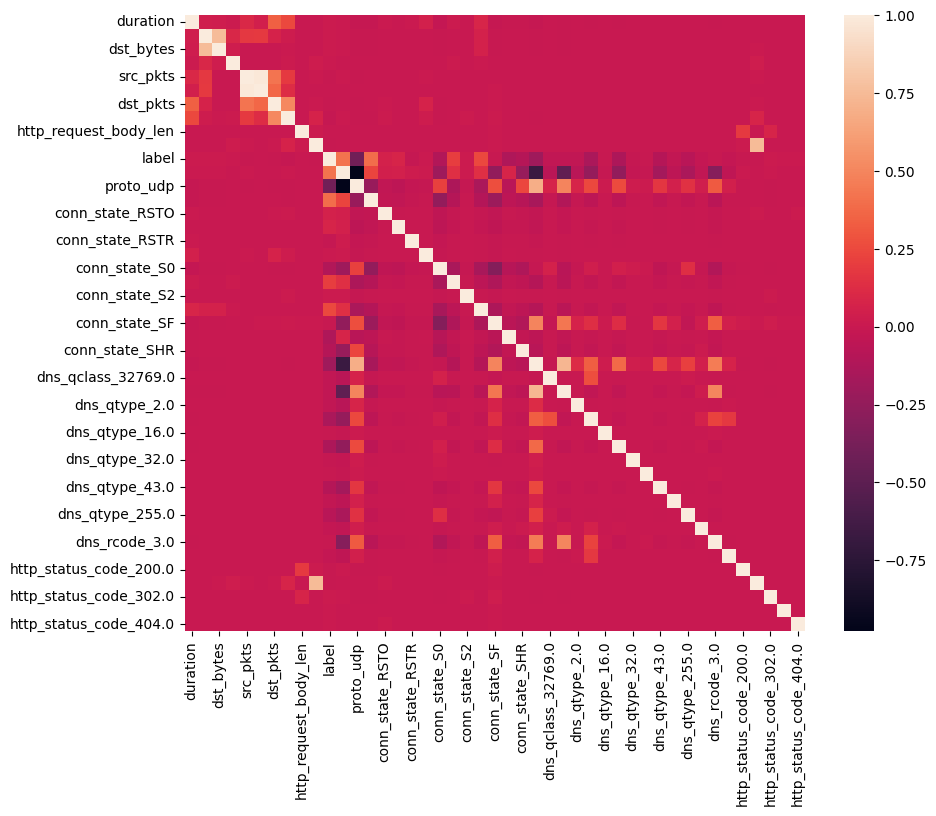

In [84]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=False)

In [89]:
data.corr()[data.corr()>0.5]

duration  src_bytes  dst_bytes  missed_bytes  \
duration                     1.0        NaN        NaN           NaN   
src_bytes                    NaN    1.00000    0.75947           NaN   
dst_bytes                    NaN    0.75947    1.00000           NaN   
missed_bytes                 NaN        NaN        NaN           1.0   
src_pkts                     NaN        NaN        NaN           NaN   
src_ip_bytes                 NaN        NaN        NaN           NaN   
dst_pkts                     NaN        NaN        NaN           NaN   
dst_ip_bytes                 NaN        NaN        NaN           NaN   
http_request_body_len        NaN        NaN        NaN           NaN   
http_response_body_len       NaN        NaN        NaN           NaN   
label                        NaN        NaN        NaN           NaN   
proto_tcp                    NaN        NaN        NaN           NaN   
proto_udp                    NaN        NaN        NaN           NaN   
conn_state_REJ               NaN        NaN        NaN           NaN   
conn_state_RSTO              NaN        NaN        NaN           NaN   
conn_state_RSTOS0            NaN        NaN        NaN           NaN   
conn_state_RSTR              NaN        NaN        NaN           NaN   
conn_state_RSTRH             NaN        NaN        NaN           NaN   
conn_state_S0                NaN        NaN        NaN           NaN   
conn_state_S1                NaN        NaN        NaN           NaN   
conn_state_S2                NaN        NaN        NaN           NaN   
conn_state_S3                NaN        NaN        NaN           NaN   
conn_state_SF                NaN        NaN        NaN           NaN   
conn_state_SH                NaN        NaN        NaN           NaN   
conn_state_SHR               NaN        NaN        NaN           NaN   
dns_qclass_1.0               NaN        NaN        NaN           NaN   
dns_qclass_32769.0           NaN        NaN        NaN           NaN   
dns_qtype_1.0                NaN        NaN        NaN           NaN   
dns_qtype_2.0                NaN        NaN        NaN           NaN   
dns_qtype_12.0               NaN        NaN        NaN           NaN   
dns_qtype_16.0               NaN        NaN        NaN           NaN   
dns_qtype_28.0               NaN        NaN        NaN           NaN   
dns_qtype_32.0               NaN        NaN        NaN           NaN   
dns_qtype_33.0               NaN        NaN        NaN           NaN   
dns_qtype_43.0               NaN        NaN        NaN           NaN   
dns_qtype_48.0               NaN        NaN        NaN           NaN   
dns_qtype_255.0              NaN        NaN        NaN           NaN   
dns_rcode_2.0                NaN        NaN        NaN           NaN   
dns_rcode_3.0                NaN        NaN        NaN           NaN   
dns_rcode_5.0                NaN        NaN        NaN           NaN   
http_status_code_200.0       NaN        NaN        NaN           NaN   
http_status_code_206.0       NaN        NaN        NaN           NaN   
http_status_code_302.0       NaN        NaN        NaN           NaN   
http_status_code_400.0       NaN        NaN        NaN           NaN   
http_status_code_404.0       NaN        NaN        NaN           NaN   

                        src_pkts  src_ip_bytes  dst_pkts  dst_ip_bytes  \
duration                     NaN           NaN       NaN           NaN   
src_bytes                    NaN           NaN       NaN           NaN   
dst_bytes                    NaN           NaN       NaN           NaN   
missed_bytes                 NaN           NaN       NaN           NaN   
src_pkts                1.000000      0.978485       NaN           NaN   
src_ip_bytes            0.978485      1.000000       NaN           NaN   
dst_pkts                     NaN           NaN  1.000000      0.507752   
dst_ip_bytes                 NaN           NaN  0.507752      1.000000   
http_request_body_len        NaN           Na

In [90]:
data.drop('src_pkts', axis=1, inplace=True)

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 44 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                160000 non-null  float64
 1   src_bytes               160000 non-null  float64
 2   dst_bytes               160000 non-null  float64
 3   missed_bytes            160000 non-null  float64
 4   src_ip_bytes            160000 non-null  float64
 5   dst_pkts                160000 non-null  float64
 6   dst_ip_bytes            160000 non-null  float64
 7   http_request_body_len   160000 non-null  float64
 8   http_response_body_len  160000 non-null  float64
 9   label                   160000 non-null  float64
 10  proto_tcp               160000 non-null  float64
 11  proto_udp               160000 non-null  float64
 12  conn_state_REJ          160000 non-null  float64
 13  conn_state_RSTO         160000 non-null  float64
 14  conn_state_RSTOS0   

In [92]:
X = data.drop('label', axis=1)
y = data['label']

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [94]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train.values)
X_test = sc.transform(X_test.values)

In [95]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [96]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [97]:
rf_pred = rfc.predict(X_test)

In [98]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     16000
         1.0       0.99      0.98      0.99     16000

    accuracy                           0.99     32000
   macro avg       0.99      0.99      0.99     32000
weighted avg       0.99      0.99      0.99     32000



In [99]:
print(confusion_matrix(y_test,rf_pred))

[[15902    98]
 [  371 15629]]


In [100]:
rfc.feature_importances_

array([7.78347790e-02, 3.30520947e-02, 5.24776808e-02, 1.18019174e-03,
       2.49759768e-01, 1.02273971e-01, 1.21705259e-01, 1.51280299e-06,
       5.57561347e-05, 6.93064051e-02, 5.39907513e-02, 5.61062755e-02,
       1.52363706e-03, 1.32439147e-02, 8.14495532e-04, 9.05895981e-04,
       8.30973578e-02, 1.19728309e-02, 1.33381838e-04, 1.32407996e-02,
       1.12214492e-02, 1.17571138e-02, 8.06878102e-03, 7.44254652e-03,
       7.05467535e-05, 7.32109612e-03, 4.52465289e-05, 2.64878546e-03,
       1.05146295e-06, 1.64823644e-03, 1.38399520e-05, 5.16764839e-06,
       6.03193880e-04, 1.59185446e-05, 2.77403715e-04, 1.31263873e-04,
       5.89055898e-03, 7.51964645e-05, 4.60730994e-05, 4.81322293e-06,
       3.12737577e-05, 1.20780455e-06, 2.47792132e-06])

In [101]:
test = dict(zip(data.drop('label',axis=1).columns, rfc.feature_importances_))

In [102]:
test

{'duration': 0.07783477901755083,
 'src_bytes': 0.033052094720125116,
 'dst_bytes': 0.052477680760887484,
 'missed_bytes': 0.001180191744078091,
 'src_ip_bytes': 0.2497597675489811,
 'dst_pkts': 0.10227397066072691,
 'dst_ip_bytes': 0.12170525915305902,
 'http_request_body_len': 1.5128029877230702e-06,
 'http_response_body_len': 5.575613471229689e-05,
 'proto_tcp': 0.06930640511756332,
 'proto_udp': 0.053990751295957276,
 'conn_state_REJ': 0.05610627546266656,
 'conn_state_RSTO': 0.0015236370561853754,
 'conn_state_RSTOS0': 0.013243914655861704,
 'conn_state_RSTR': 0.0008144955321372601,
 'conn_state_RSTRH': 0.0009058959811874851,
 'conn_state_S0': 0.08309735783828617,
 'conn_state_S1': 0.011972830936183437,
 'conn_state_S2': 0.0001333818383119921,
 'conn_state_S3': 0.013240799564715699,
 'conn_state_SF': 0.01122144920964588,
 'conn_state_SH': 0.011757113801744658,
 'conn_state_SHR': 0.008068781019291706,
 'dns_qclass_1.0': 0.007442546521535116,
 'dns_qclass_32769.0': 7.054675350899481

In [115]:
test_dir = "C:\\Users\\soup\\Desktop\\DS400-Capstone\\DS400-Capstone\\main\\test.pcap"

In [ ]:
with open(test_dir, "rb") as f:
    while (byte := f.read(1)):
        print(byte)